# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [31]:
# Code Here
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize, LabelBinarizer
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

In [4]:
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins['male'] = pd.get_dummies(penguins['sex'], dtype= float, drop_first= True)
species = pd.get_dummies(penguins['species'], dtype= float)
island = pd.get_dummies(penguins['island'], dtype= float, drop_first=True)
penguins = pd.concat([penguins, species, island], axis=1)
penguins.drop(['sex', 'island'], axis=1, inplace=True)
penguins.dropna(inplace=True)
penguins.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,male,Adelie,Chinstrap,Gentoo,Dream,Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,2007,1.0,1.0,0.0,0.0,0.0,1.0
1,Adelie,39.5,17.4,186.0,3800.0,2007,0.0,1.0,0.0,0.0,0.0,1.0
2,Adelie,40.3,18.0,195.0,3250.0,2007,0.0,1.0,0.0,0.0,0.0,1.0
4,Adelie,36.7,19.3,193.0,3450.0,2007,0.0,1.0,0.0,0.0,0.0,1.0
5,Adelie,39.3,20.6,190.0,3650.0,2007,1.0,1.0,0.0,0.0,0.0,1.0


Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

0.6976744186046512
0.7298223858671804
0.6976744186046512
0.6851063864867316
Overall ROC AUC: 0.8382699446537537


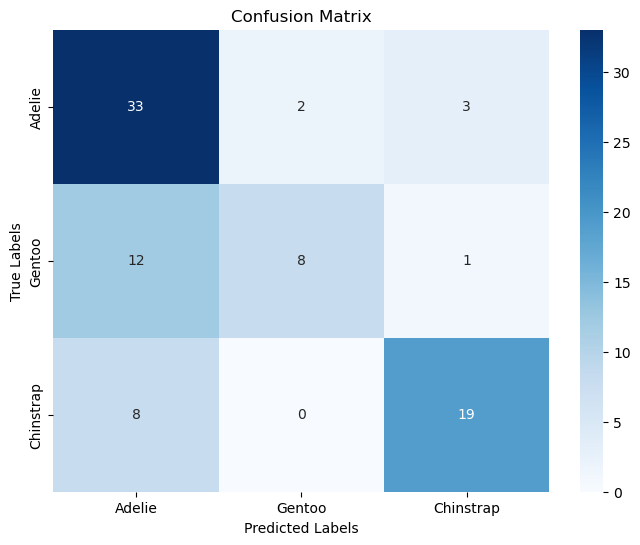

In [33]:
#kNN 1

X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'male', 'Dream', 'Torgersen']]
y = penguins['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


k_pipeline = Pipeline(
  [
  ("k_classifier", KNeighborsClassifier(n_neighbors=5))]
).set_output(transform="pandas")

k_fit = k_pipeline.fit(X_train,y_train)

k_pred = k_fit.predict(X_test)

print(accuracy_score(y_test, k_pred))
print(precision_score(y_test, k_pred, average='weighted'))
print(recall_score(y_test, k_pred, average='weighted'))
print(f1_score(y_test, k_pred, average='weighted'))

#auc value average
y_probs = k_fit.predict_proba(X_test)

label_binarizer = LabelBinarizer()
y_test_bin = label_binarizer.fit_transform(y_test)

roc_auc_scores = roc_auc_score(y_test_bin, y_probs, average=None)

for i, score in enumerate(roc_auc_scores):
    f"Class {i}: {score}"

overall_roc_auc = roc_auc_scores.mean()
print("Overall ROC AUC:", overall_roc_auc)

#Conf matrix
conf_matrix = confusion_matrix(y_test, k_pred)
class_labels = y.unique()

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

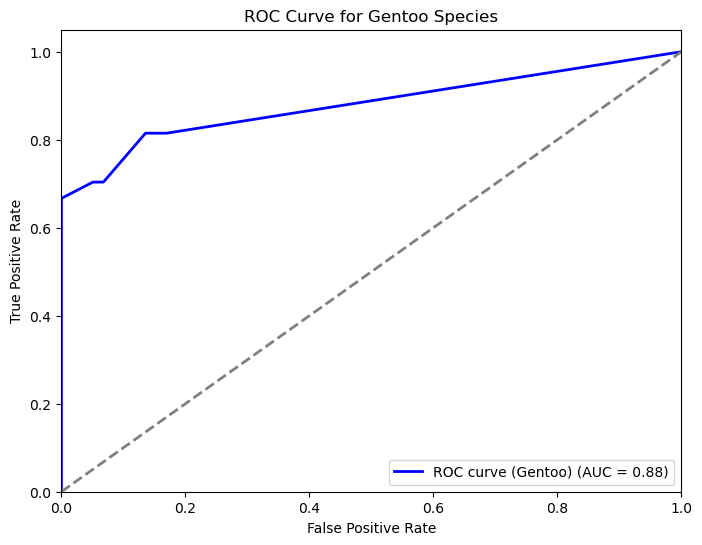

In [28]:
#Roc Curve
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'male', 'Dream', 'Torgersen']]
y = penguins['species']


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=1)


k_pipeline = Pipeline([
    ("k_classifier", KNeighborsClassifier(n_neighbors=5))
]).set_output(transform="pandas")


k_fit = k_pipeline.fit(X_train, y_train)

y_probs = k_fit.predict_proba(X_test)

y_test_bin = label_binarize(y_test, classes=np.unique(y_encoded))

gentoo_class_index = label_encoder.transform(['Gentoo'])[0]

fpr, tpr, _ = roc_curve(y_test_bin[:, gentoo_class_index], y_probs[:, gentoo_class_index])
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (Gentoo) (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gentoo Species')
plt.legend(loc="lower right")
plt.show()

0.627906976744186
0.4913283405597162
0.627906976744186
0.5448333732917765
Overall ROC AUC: 0.8406613704422581


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


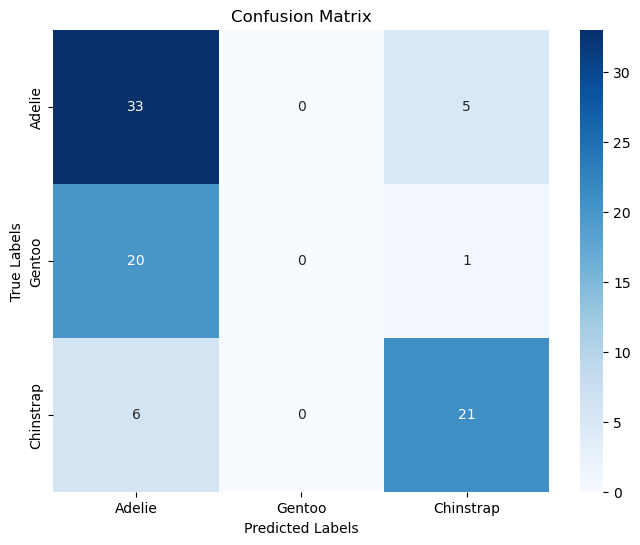

In [34]:
#kNN 2
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'male', 'Dream', 'Torgersen']]
y = penguins['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


k_pipeline = Pipeline(
  [
  ("k_classifier", KNeighborsClassifier(n_neighbors=50))]
).set_output(transform="pandas")

k_fit = k_pipeline.fit(X_train,y_train)

k_pred = k_fit.predict(X_test)

print(accuracy_score(y_test, k_pred))
print(precision_score(y_test, k_pred, average='weighted'))
print(recall_score(y_test, k_pred, average='weighted'))
print(f1_score(y_test, k_pred, average='weighted'))
#auc value average
y_probs = k_fit.predict_proba(X_test)

label_binarizer = LabelBinarizer()
y_test_bin = label_binarizer.fit_transform(y_test)

roc_auc_scores = roc_auc_score(y_test_bin, y_probs, average=None)

for i, score in enumerate(roc_auc_scores):
    f"Class {i}: {score}"

overall_roc_auc = roc_auc_scores.mean()
print("Overall ROC AUC:", overall_roc_auc)



conf_matrix = confusion_matrix(y_test, k_pred)
class_labels = y.unique()

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

0.9651162790697675
0.9658590937660705
0.9651162790697675
0.9652893455922119
Overall ROC AUC: 0.9849622051924684


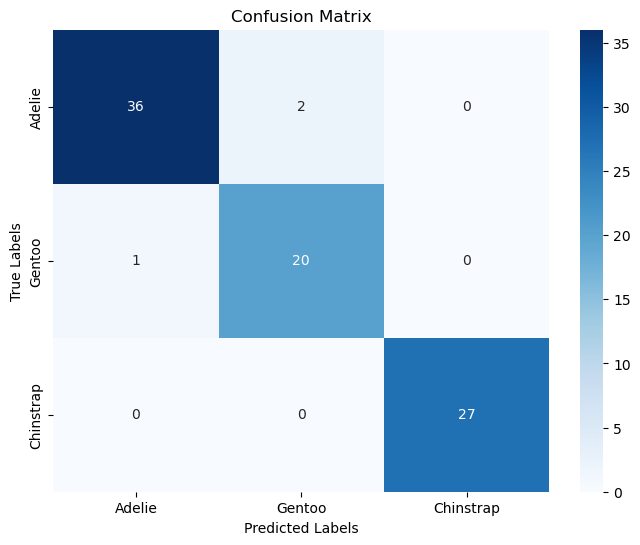

In [35]:
#Tree 1

X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'male', 'Dream', 'Torgersen']]
y = penguins['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


tree_pipeline = Pipeline(
  [
  ("tree_classifier", DecisionTreeClassifier(min_samples_leaf=5))]
).set_output(transform="pandas")

tree_fit = tree_pipeline.fit(X_train,y_train)

tree_pred = tree_fit.predict(X_test)

print(accuracy_score(y_test, tree_pred))
print(precision_score(y_test, tree_pred, average='weighted'))
print(recall_score(y_test, tree_pred, average='weighted'))
print(f1_score(y_test, tree_pred, average='weighted'))
#auc value average
y_probs = tree_fit.predict_proba(X_test)

label_binarizer = LabelBinarizer()
y_test_bin = label_binarizer.fit_transform(y_test)

roc_auc_scores = roc_auc_score(y_test_bin, y_probs, average=None)

for i, score in enumerate(roc_auc_scores):
    f"Class {i}: {score}"

overall_roc_auc = roc_auc_scores.mean()
print("Overall ROC AUC:", overall_roc_auc)


conf_matrix = confusion_matrix(y_test, tree_pred)
class_labels = y.unique()

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

0.9418604651162791
0.942122632780211
0.9418604651162791
0.9402661292196175
Overall ROC AUC: 0.9776689901875747


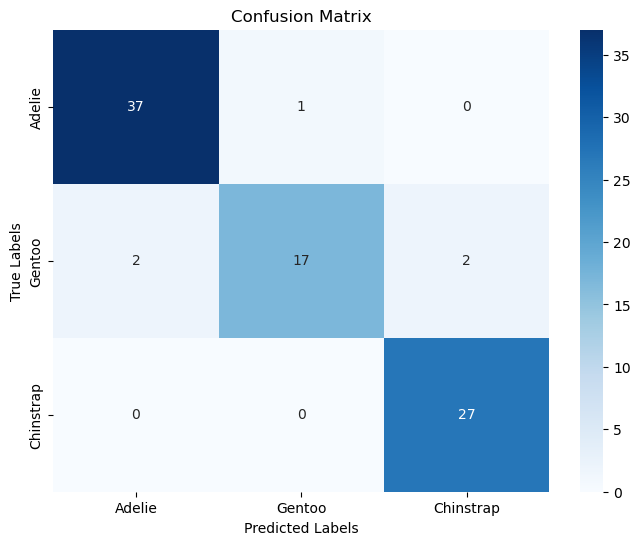

In [36]:
#Tree 2

X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'male', 'Dream', 'Torgersen']]
y = penguins['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


tree_pipeline = Pipeline(
  [
  ("tree_classifier", DecisionTreeClassifier(min_samples_leaf=20))]
).set_output(transform="pandas")

tree_fit = tree_pipeline.fit(X_train,y_train)

tree_pred = tree_fit.predict(X_test)

print(accuracy_score(y_test, tree_pred))
print(precision_score(y_test, tree_pred, average='weighted'))
print(recall_score(y_test, tree_pred, average='weighted'))
print(f1_score(y_test, tree_pred, average='weighted'))
#auc value average
y_probs = tree_fit.predict_proba(X_test)

label_binarizer = LabelBinarizer()
y_test_bin = label_binarizer.fit_transform(y_test)

roc_auc_scores = roc_auc_score(y_test_bin, y_probs, average=None)

for i, score in enumerate(roc_auc_scores):
    f"Class {i}: {score}"

overall_roc_auc = roc_auc_scores.mean()
print("Overall ROC AUC:", overall_roc_auc)


conf_matrix = confusion_matrix(y_test, tree_pred)
class_labels = y.unique()

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()